In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import statsmodels.api as sm


In [27]:
df = pd.read_csv("Company.csv")

In [28]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [29]:
df["consy"] = 1
df["consy2"] = 3

In [30]:
df

,TV,Radio,Newspaper,Sales,consy,consy2
0,230.1,37.8,69.2,22.1,1,3
1,44.5,39.3,45.1,10.4,1,3
2,17.2,45.9,69.3,12.0,1,3
3,151.5,41.3,58.5,16.5,1,3
4,180.8,10.8,58.4,17.9,1,3
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1,3
196,94.2,4.9,8.1,14.0,1,3
197,177.0,9.3,6.4,14.8,1,3
198,283.6,42.0,66.2,25.5,1,3


In [31]:
X = df[["consy"]]
y = df["Sales"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X,y)

LinearRegression()

In [32]:
model.coef_

array([0.])

In [33]:
model.intercept_

15.130500000000001

In [24]:
df["Sales"].mean()

15.130500000000001

In [310]:
sex = ["Maschio"] * 100 + ["Femmina"] * 100
df['Genere'] = sex

In [313]:
df

,TV,Radio,Newspaper,Sales,Genere
0,230.1,37.8,69.2,22.1,Maschio
1,44.5,39.3,45.1,10.4,Maschio
2,17.2,45.9,69.3,12.0,Maschio
3,151.5,41.3,58.5,16.5,Maschio
4,180.8,10.8,58.4,17.9,Maschio
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Femmina
196,94.2,4.9,8.1,14.0,Femmina
197,177.0,9.3,6.4,14.8,Femmina
198,283.6,42.0,66.2,25.5,Femmina


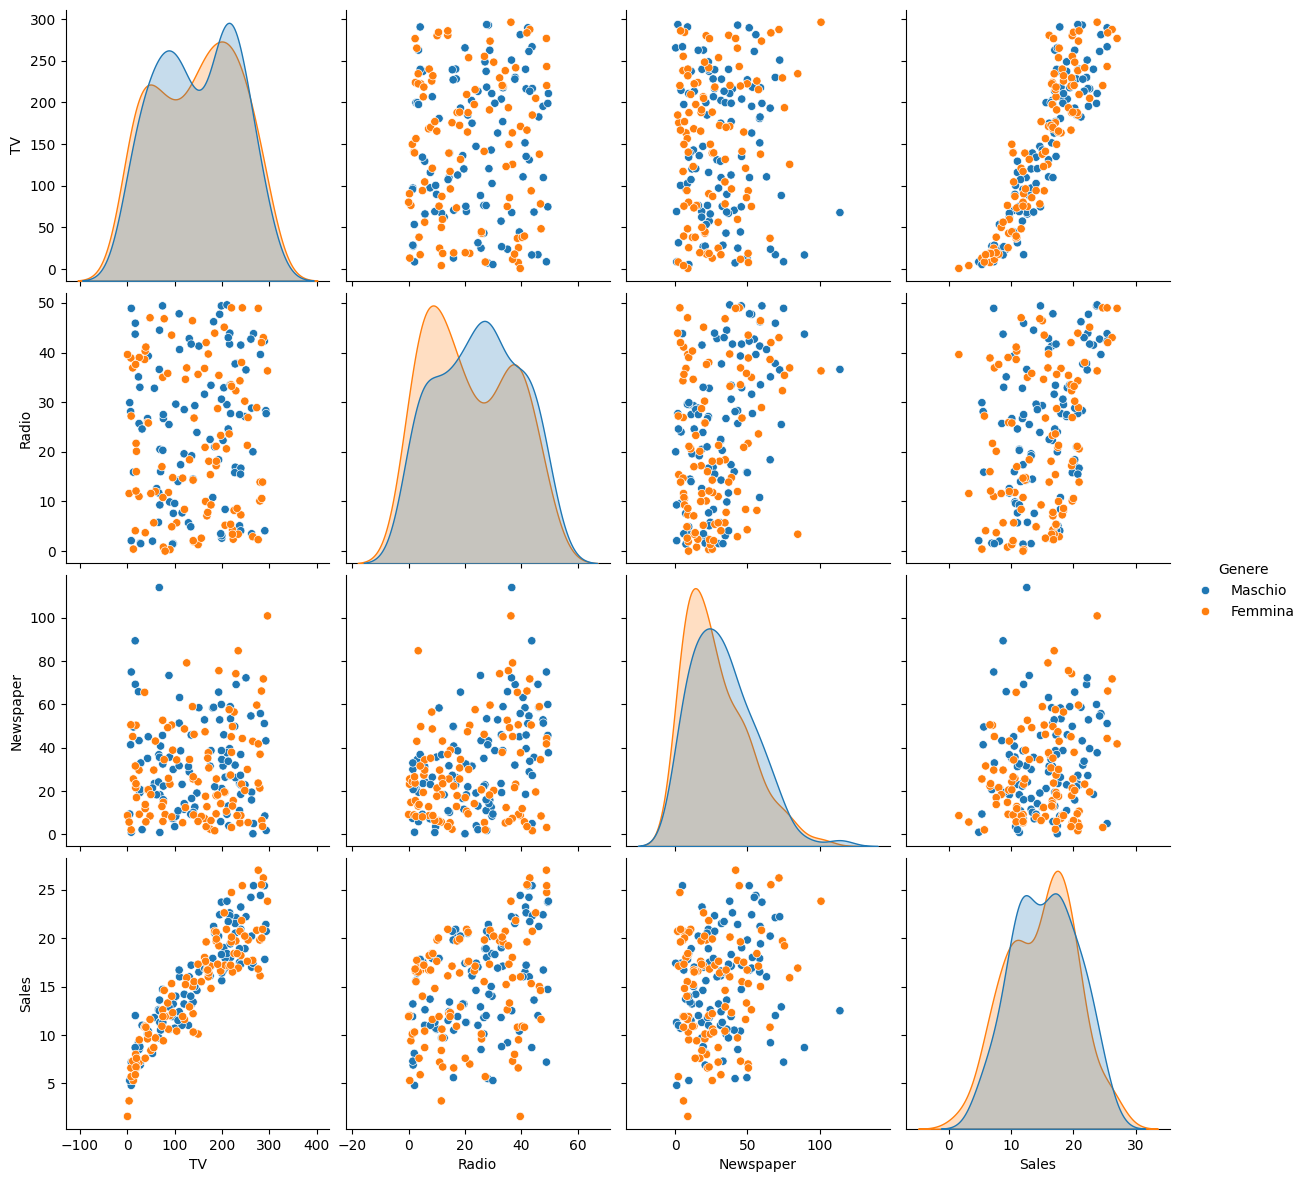

In [314]:
sns.pairplot(df, height=3, hue="Genere")

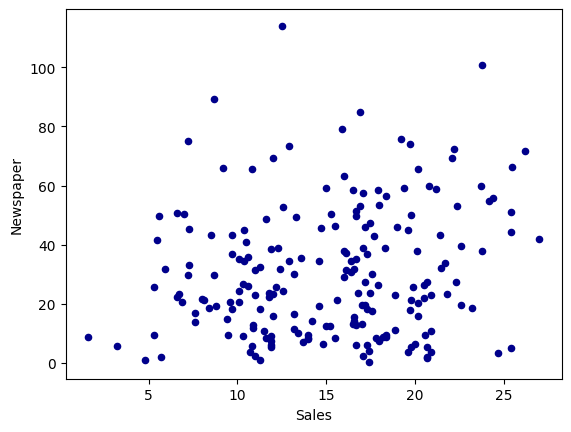

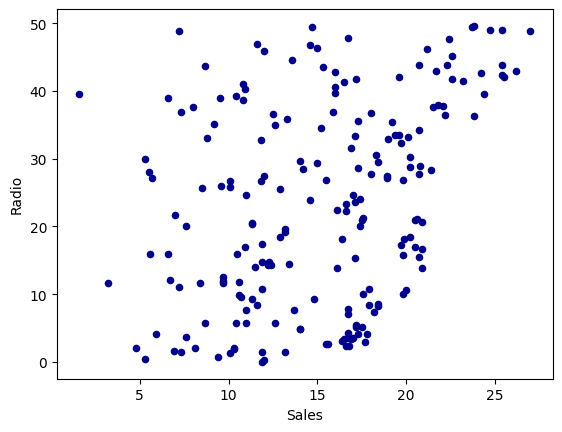

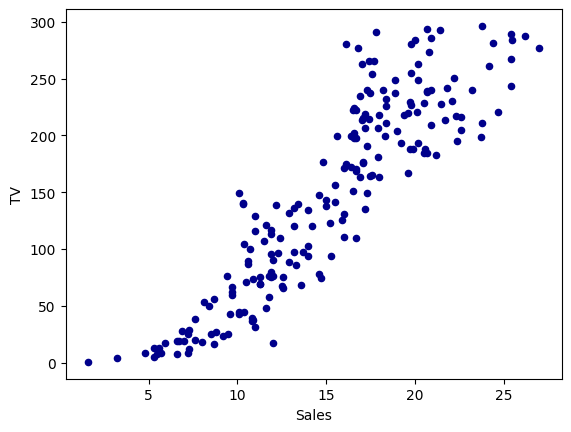

In [278]:
ax1 = df.plot.scatter(x='Sales',
                      y='Newspaper',
                      c='DarkBlue')

ax2 = df.plot.scatter(x='Sales',
                      y='Radio',
                      c='DarkBlue')

ax3 = df.plot.scatter(x='Sales',
                      y='TV',
                      c='DarkBlue')

In [279]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Coefficiente di regressione (pesi): [ 0.05501361  0.11040316 -0.00361274]
Intercetta: 4.513640594819652
Mean Squared Error (MSE): 2.816214468002782
R2 score: 0.8949009939756739


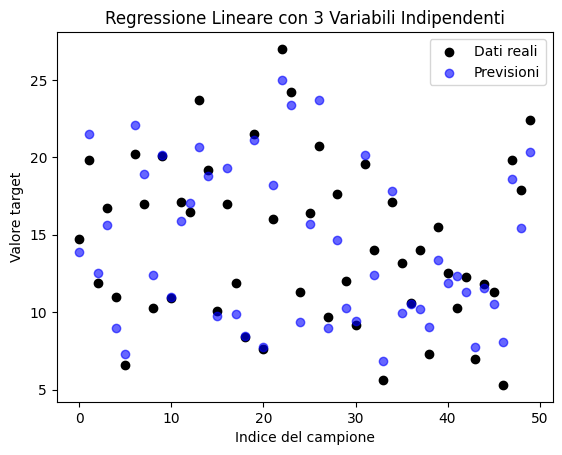

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]  # Sostituisci con i nomi delle tue variabili indipendenti
y = df['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficiente di regressione (pesi):", model.coef_)
print("Intercetta:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color='black', label='Dati reali')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Previsioni', alpha=0.6)
plt.title("Regressione Lineare con 3 Variabili Indipendenti")
plt.xlabel("Indice del campione")
plt.ylabel("Valore target")
plt.legend()
plt.show()

In [281]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [282]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [283]:
lin_reg = sm.OLS(df[["TV"]],df["Sales"])
regl = lin_reg.fit()

regl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     TV   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                   6.42e-118
Time:                        12:15:16   Log-Likelihood:                         -1042.8
No. Observations:                 200   AIC:                                      2088.
Df Residuals:                     199   BIC:                                      2091.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sales         10.2512      0.197     52.092      0.000       9.863      10.639
==============================================================================
Omnibus:                        8.621   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.719
Skew:                           0.477   Prob(JB):                       0.0128
Kurtosis:                       2.630   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
lin_reg = sm.OLS(df[["Radio"]],df["Sales"])
regl = lin_reg.fit()

regl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Radio   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              557.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                    1.35e-59
Time:                        12:15:16   Log-Likelihood:                         -813.69
No. Observations:                 200   AIC:                                      1629.
Df Residuals:                     199   BIC:                                      1633.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sales          1.4775      0.063     23.604      0.000       1.354       1.601
==============================================================================
Omnibus:                        7.980   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                5.268
Skew:                           0.249   Prob(JB):                       0.0718
Kurtosis:                       2.379   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
lin_reg = sm.OLS(df[["Newspaper"]],df["Sales"])
regl = lin_reg.fit()

regl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Newspaper   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              353.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                    5.60e-46
Time:                        12:15:16   Log-Likelihood:                         -906.55
No. Observations:                 200   AIC:                                      1815.
Df Residuals:                     199   BIC:                                      1818.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sales          1.8713      0.100     18.792      0.000       1.675       2.068
==============================================================================
Omnibus:                       17.650   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.226
Skew:                           0.669   Prob(JB):                     4.05e-05
Kurtosis:                       3.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Intercetta (beta_0): 4.625124078808652
Coefficiente beta_1: 0.054445780337570936
Coefficiente beta_2: 0.10700122823870295
Coefficiente beta_3: 0.0003356579223305761
Errore quadratico medio (MSE): 2.706006147627315


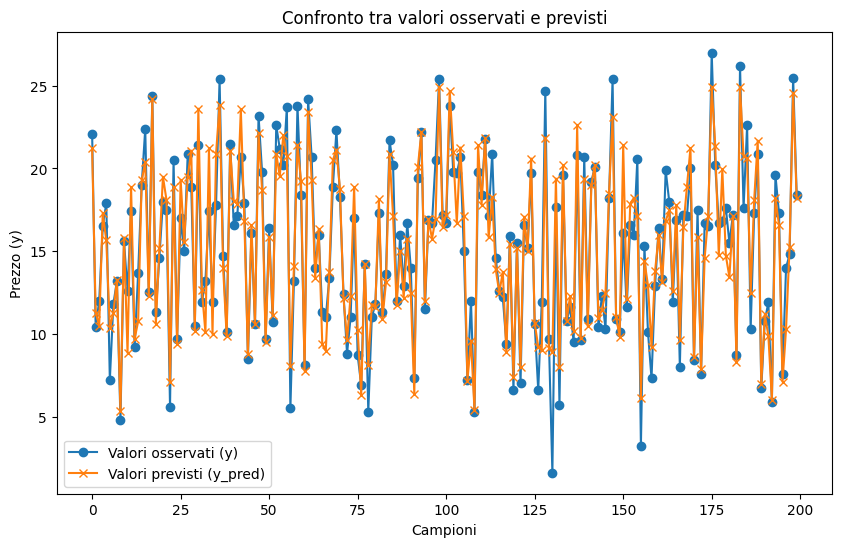

In [287]:
# Definisci le variabili indipendenti (X) e la variabile dipendente (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X, y)

# Ottieni i coefficienti beta (intercetta e slope per ciascuna variabile)
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

print("Intercetta (beta_0):", beta_0)
print("Coefficiente beta_1:", beta_1)
print("Coefficiente beta_2:", beta_2)
print("Coefficiente beta_3:", beta_3)

# Effettua delle previsioni
y_pred = model.predict(X)

# Calcola l'errore quadratico medio (opzionale)
mse = mean_squared_error(y, y_pred)
print("Errore quadratico medio (MSE):", mse)

# Grafico della variabile dipendente prevista e osservata
plt.figure(figsize=(10, 6))
plt.plot(y, label="Valori osservati (y)", marker='o')
plt.plot(y_pred, label="Valori previsti (y_pred)", marker='x')
plt.xlabel("Campioni")
plt.ylabel("Prezzo (y)")
plt.title("Confronto tra valori osservati e previsti")
plt.legend()
plt.show()


Intercetta (beta_0): 4.625124078808652
Coefficiente beta_1: 0.054445780337570936
Coefficiente beta_2: 0.10700122823870295
Coefficiente beta_3: 0.0003356579223305761


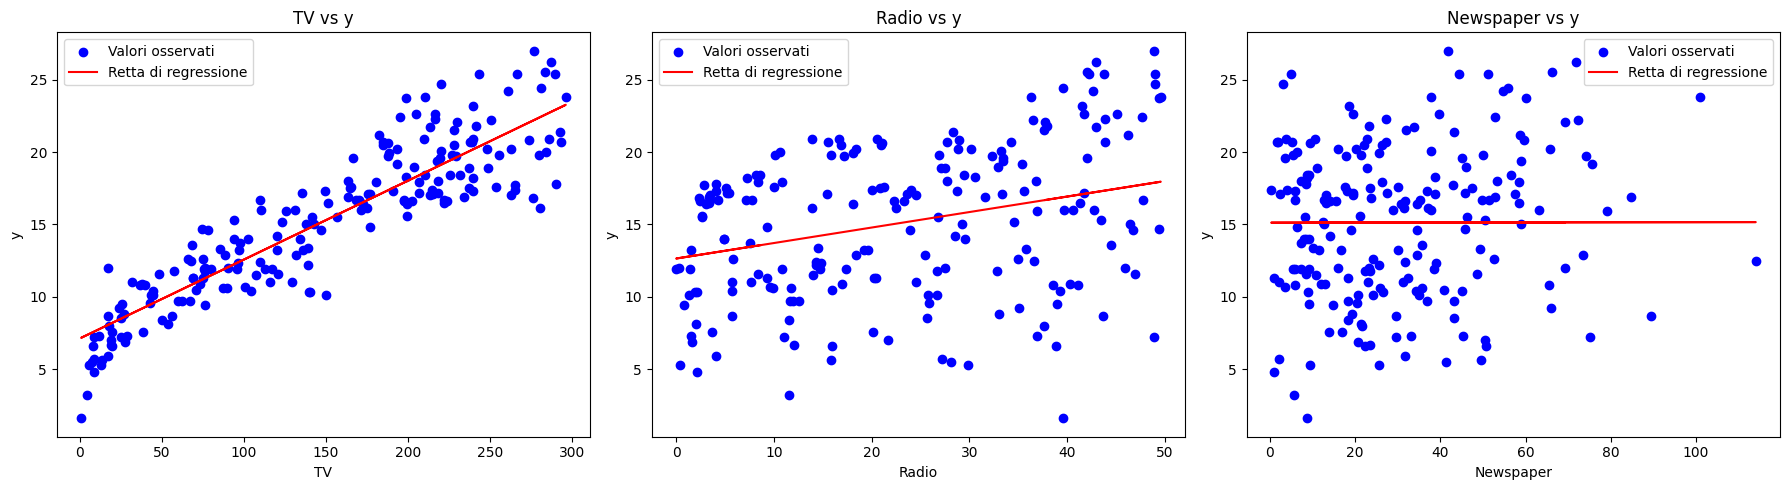

In [288]:


# Definisci le variabili indipendenti (X) e la variabile dipendente (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X, y)

# Ottieni i coefficienti beta (intercetta e slope per ciascuna variabile)
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

print("Intercetta (beta_0):", beta_0)
print("Coefficiente beta_1:", beta_1)
print("Coefficiente beta_2:", beta_2)
print("Coefficiente beta_3:", beta_3)

# Effettua delle previsioni
y_pred = model.predict(X)

# Grafici per ogni variabile indipendente rispetto a y con la retta di regressione

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. TV vs y
axs[0].scatter(X['TV'], y, color='blue', label="Valori osservati")
axs[0].plot(X['TV'], beta_0 + beta_1 * X['TV'] + beta_2 * X['Radio'].mean() + beta_3 * X['Newspaper'].mean(), color='red', label="Retta di regressione")
axs[0].set_xlabel("TV")
axs[0].set_ylabel("y")
axs[0].set_title("TV vs y")
axs[0].legend()

# 2. Radio vs y
axs[1].scatter(X['Radio'], y, color='blue', label="Valori osservati")
axs[1].plot(X['Radio'], beta_0 + beta_1 * X['TV'].mean() + beta_2 * X['Radio'] + beta_3 * X['Newspaper'].mean(), color='red', label="Retta di regressione")
axs[1].set_xlabel("Radio")
axs[1].set_ylabel("y")
axs[1].set_title("Radio vs y")
axs[1].legend()

# 3. Newspaper vs y
axs[2].scatter(X['Newspaper'], y, color='blue', label="Valori osservati")
axs[2].plot(X['Newspaper'], beta_0 + beta_1 * X['TV'].mean() + beta_2 * X['Radio'].mean() + beta_3 * X['Newspaper'], color='red', label="Retta di regressione")
axs[2].set_xlabel("Newspaper")
axs[2].set_ylabel("y")
axs[2].set_title("Newspaper vs y")
axs[2].legend()

plt.tight_layout()
plt.show()

In [289]:
model = LinearRegression()

In [290]:
X = df[['TV', 'Radio', 'Newspaper']] 
y = df['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [291]:
model.fit(X_train, y_train)

LinearRegression()

In [292]:
model.score(X,y)

0.902093657624923

In [293]:
model.coef_

array([ 0.05501361,  0.11040316, -0.00361274])

In [294]:
model.intercept_

4.513640594819652

In [295]:
df_predict = pd.DataFrame(y_test)


In [296]:
df_predict["predict"] = model.predict(X_test)

In [297]:
df_predict

,Sales,predict
37,14.7,13.911971
109,19.8,21.514090
31,11.9,12.506240
89,16.7,15.645711
66,11.0,8.954539
119,6.6,7.266791
54,20.2,22.087883
74,17.0,18.922135
145,10.3,12.409301
142,20.1,20.172603


In [298]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 37 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sales    50 non-null     float64
 1   predict  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [299]:
df_predict["Sales"].count()

50

In [300]:
sum((df_predict["Sales"] - df_predict["predict"])**2)/df_predict["Sales"].count()

2.8162144680027814

In [301]:
df.to_excel("company_excell.xlsx")

In [302]:
y_pred

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [303]:
print(f"i coefficienti sono: {model.coef_}")

i coefficienti sono: [ 0.05501361  0.11040316 -0.00361274]


In [304]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def RegressioneLineare(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"i coefficienti sono: {model.coef_}")
    print(f"l'intercetta è: {model.intercept_}")
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"Errore quadratico medio (MSE): {mse}")

    #grafico con retta che fitta bene
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color="blue", label="Valori reali vs predetti")

    model = LinearRegression()
    model.fit(y.reshape(-1, 1), y_pred)
    y_fit = model.predict(y.reshape(-1, 1))
    plt.plot(y, y_fit, color="red", linewidth=2, label="Retta di regressione")

    plt.plot([y.min(), y.max()], [y.min(), y.max()], color="green", linestyle="--", label="y = x (riferimento)")

    plt.xlabel("Valori Reali (y)")
    plt.ylabel("Valori Predetti (y_pred)")
    plt.title("Scatter Plot con Retta di Regressione")
    plt.legend()
    
    plt.show()

In [305]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

i coefficienti sono: [ 0.05493018  0.1095576  -0.00619422]
l'intercetta è: 4.681232151484293
Errore quadratico medio (MSE): 2.7251468773277416


AttributeError: 'Series' object has no attribute 'reshape'

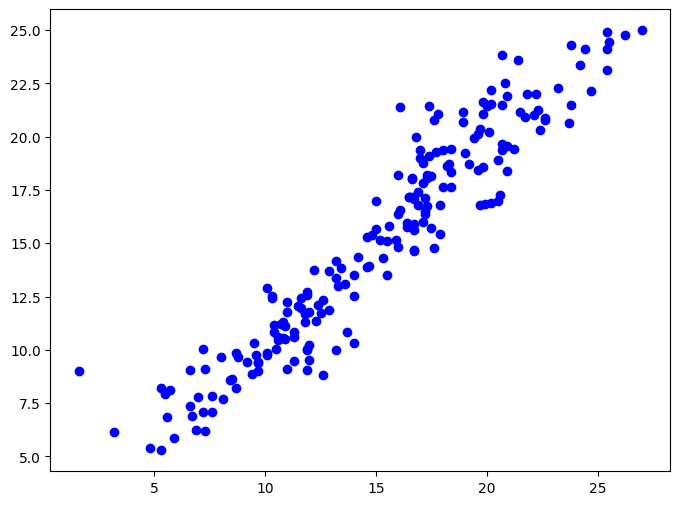

In [306]:
RegressioneLineare(X,y)

Errore quadratico medio (MSE): 2.7224655050803532


AttributeError: 'Series' object has no attribute 'reshape'

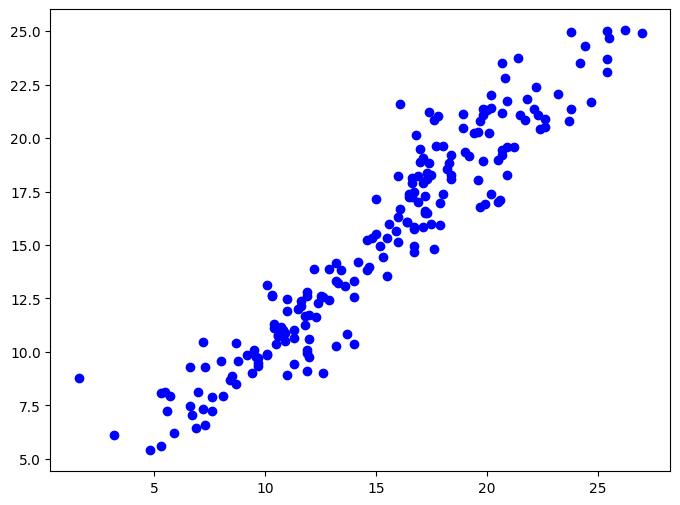

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supponiamo di avere già i valori reali (y) e i valori predetti (y_pred)
# Creiamo un dataset di esempio

# Calcoliamo il Mean Squared Error per valutare il fit
mse = mean_squared_error(y, y_pred)
print("Errore quadratico medio (MSE):", mse)

# Creiamo lo scatter plot dei valori reali vs valori predetti
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color="blue", label="Valori reali vs predetti")

# Aggiungiamo la retta di regressione (fittata sui valori predetti)
model = LinearRegression()
model.fit(y.reshape(-1, 1), y_pred)
y_fit = model.predict(y.reshape(-1, 1))
plt.plot(y, y_fit, color="red", linewidth=2, label="Retta di regressione")

# Linea di riferimento (ideale y = x per valori predetti = valori reali)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="green", linestyle="--", label="y = x (riferimento)")

# Configurazione del grafico
plt.xlabel("Valori Reali (y)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Scatter Plot con Retta di Regressione")
plt.legend()
plt.show()

---

In [117]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [120]:
model = LinearRegression()

In [134]:
X = df[['TV', 'Radio', 'Newspaper']] 
y = df['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(X_train, y_train)

LinearRegression()

In [133]:
model.score(X,y)

0.902093657624923

In [132]:
y_pred = model.predict(X_test)